# 1 Introduction

Welcome to the ninth practical session of CS233 - Introduction to Machine Learning.  
In this exercise class we will start using Machine Learning methods to solve regression problems.

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 2 Regression Problem

Let $f$ be a function $f: \mathbb{R}^d \rightarrow \mathbb{R}^v$ with a data set $\left(X \subseteq \mathbb{R}^d, y
\subseteq\mathbb{R}^v \right )$. The regression problem is the task of estimating an approximation $\hat{f}$ of $f$.
Within this exercise we consider the special case of $v=1$, i.e. the problem is univariate as opposed to multivariate.
Specifically, we will analyze the Boston house prices data set and predict costs based on properties such as per capita crime rate by town, pupil-teacher ratio by town etc.

We will model the given data by means of a linear regression model, i.e. a model that explains a dependent variable in terms of a linear combination of independent variables.

- How does a regression problem differ from a classification problem?
- Why is the linear regression model a linear model? Is it linear in the dependent variables? Is it linear in the parameters?

# 2.1 Load and inspect data

We load the data and split it such that 80% and 20% are train and test data, respectively. 
After, we normalize the data such that each feature has zero mean and unit standard deviation. Please fill in the required code and complete the function `normalize`.

- Explore the relation between different features and the house prices. Describe what you see. Can you identify any trends?

In [2]:
# get the data set and print a description
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.DESCR)

X = boston_dataset["data"]
y = boston_dataset["target"]

# remove categorical feature
X = np.delete(X, 3, axis=1)
# removing second mode
ind = y<40
X = X[ind,:]
y = y[ind]

# split the data into 80% training and 20% test data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

splitRatio = 0.8
n          = X.shape[0]
X_train    = X[indices[0:int(n*splitRatio)],:] 
y_train    = y[indices[0:int(n*splitRatio)]] 
X_test     = X[indices[int(n*(splitRatio)):],:] 
y_test     = y[indices[int(n*(splitRatio)):]] 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
'''
Make mean 1 and std dev 0 of the data.
'''
def normalize(X):
    """
    Please fill in the required code here
    """
    
    mu    = np.mean(X)
    std   = np.std(X)
    X     = (X - mu) / std  # normalize
    return X, mu, std

#Use train stats for normalizing test set
X_train,mu_train,std_train = normalize(X_train)
X_test = (X_test-mu_train)/std_train

Text(0.5, 1.0, 'Attribute $X_0$ vs Price $y$')

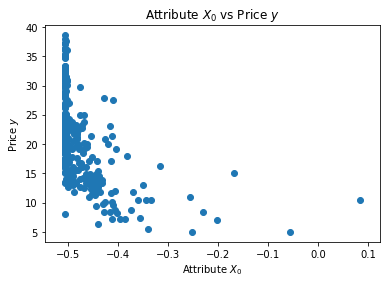

In [4]:
# exploratory analysis of the data

feature = 0
plt.scatter(X_train[:,feature], y_train)
plt.xlabel(f"Attribute $X_{feature}$")
plt.ylabel("Price $y$")
plt.title(f"Attribute $X_{feature}$ vs Price $y$")

# 2.2 Closed-form solution for linear regression

The linear regression model has an [analytical solution](https://en.wikipedia.org/wiki/Linear_least_squares). 
Please use this solution to complete the function `get_w_analytical` and to obtain the weight parameters $w$. Tip: You may want to use the function np.linalg.solve. 

- What is the time complexity of this approach?

In [10]:
def get_w_analytical(X_train,y_train):
    """compute the weight parameters w"""
        
    # compute w via the normal equation
    # X @ w = y
    w = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)
    return w

def get_loss(w, X_train, y_train,X_test,y_test,val=False):
    # predict dependent variables and MSE loss for seen training data
    """
    Please fill in the required code here
    """
    loss_train = np.mean((y_train - X_train @ w) ** 2)
    loss_train_std = np.std((y_train - X_train @ w) ** 2)
        
    # predict dependent variables and MSE loss for unseen test data
    """
    Please fill in the required code here
    """
    loss_test = np.mean((y_test - X_test @ w) ** 2)
    loss_test_std = np.std((y_test - X_test @ w) ** 2)
    
    if not val:
        print("The training loss is {} with std:{}. The test loss is {} with std:{}.".format(loss_train, loss_train_std, loss_test,loss_test_std))
    else:
        print("The training loss is {} with std:{}. The val loss is {} with std:{}.".format(loss_train, loss_train_std, loss_test,loss_test_std))

    return loss_test

In [13]:
# compute w and calculate its goodness
w_ana = get_w_analytical(X_train,y_train)
get_loss(w_ana, X_train,y_train, X_test,y_test)

The training loss is 10.743863402737372 with std:20.84919976462016. The test loss is 12.448309149096193 with std:24.933808088335738.


12.448309149096193

###### 2.3 Feature expansion

Similar to feature expansion for classification problems, we can also perform feature expansion here. Please complete the function `expand_X` and perform a degree-2 polynomial feature expansion of X, including a bias term but omitting interaction terms.

- Is our model still a linear regression model? Why (not)?
- How does linear regression on degree-2 polynomially expanded data compare against our previous model? Explain!
- Try polynomial feature expansion for different parameters values of $d$. What do you observe? Explain!
- Look up the concept of the condition number of a matrix. What does this tell us about the feature-expanded data?

In [17]:
def expand_X(X,d):
    """perform degree-d polynomial feature expansion of X, with bias but omitting interaction terms"""
    
    """
    Please fill in the required code here
    """
    
    expand = np.ones((np.shape(X)[0], 1))
    
    for i in range(1, d + 1):
        expand = np.hstack((expand, X ** i))

    return expand

In [18]:
def expand_and_normalize_X(X,d):
    """
    perform degree-d polynomial feature expansion of X, with bias but omitting interaction terms
    and normalize them and return mean and std
    """
    
    """
    Please fill in the required code here
    """
    
    expand = expand_X(X, d)
    expand_no_bias = expand[:, 1:]
    expand_no_bias, mu, std = normalize(expand_no_bias)
    
    expand[:, 1:] = expand_no_bias

    return expand, mu, std

In [19]:
# perform polynomial feature expansion
d  = 2

#normalize the data after expansion
X_train_poly,mu_train_poly,std_train_poly = expand_and_normalize_X(X_train,d)
X_test_poly  = expand_X(X_test,d)
X_test_poly[:,1:]  = (X_test_poly[:,1:]-mu_train_poly)/std_train_poly


print("The original data has {} features.".format(X_train.shape[1]))
print("After degree-{} polynomial feature expansion (with bias, without interaction terms) the data has {} features.".format(d,X_train_poly.shape[1]))

cond_num_before = np.linalg.cond(X_train.T@X_train)
cond_num_after = np.linalg.cond(X_train_poly.T@X_train_poly)
print("The original data X^TX has condition number {}. \nThe expanded data X^TX has condition number {}.".format(cond_num_before,cond_num_after))

# re-compute w and calculate its goodness
w_augm = get_w_analytical(X_train_poly,y_train)
get_loss(w_augm, X_train_poly,y_train, X_test_poly,y_test)

The original data has 12 features.
After degree-2 polynomial feature expansion (with bias, without interaction terms) the data has 25 features.
The original data X^TX has condition number 2651084.5926421764. 
The expanded data X^TX has condition number 1213502807339206.8.
The training loss is 8.146544669840928 with std:18.144684610999942. The test loss is 8.57678443846797 with std:13.494133346766404.


8.57678443846797

In above exercise, we directly evaluate model on test loss and choose the best degree of polynomial. But test should not be touched until your final model. So to choose best degree we'll use Cross Validation. We're going to K-Fold CV for that. We will use our training set and create K splits of it to choose best degree and finally evaluate on our test set.


In [21]:
# Function for using kth split as validation set to get loss
# and k-1 splits to train our model
# k = kth fold
# k_fold_ind = all the fold indices
# X,Y= train data and labels
# degree = degree of polynomial expansion

def do_cross_validation(k,k_fold_ind,X,Y,degree=1):
    
    # use one split as val
    val_ind = k_fold_ind[k]
    # use k-1 split to train
    train_splits = [i for i in range(k_fold_ind.shape[0]) if i is not k]
    train_ind = k_fold_ind[train_splits,:].reshape(-1)
    
    #Get train and val 
    cv_X_train = X[train_ind,:]
    cv_Y_train = Y[train_ind]
    cv_X_val = X[val_ind,:]
    cv_Y_val = Y[val_ind]

    #expand and normalize for degree d
    cv_X_train_poly,mu,std = expand_and_normalize_X(cv_X_train, d)
    #apply the normalization using statistics (mean, std) computed on train data
    cv_X_val_poly = expand_X(cv_X_val, d)
    cv_X_val_poly[:, 1:] = (cv_X_val_poly[:, 1:] - mu)/std

    
    #fit on train set
    w = get_w_analytical(cv_X_train_poly, cv_Y_train)
    
    #get loss for val
    loss_test = get_loss(w,cv_X_train_poly,cv_Y_train,cv_X_val_poly,cv_Y_val,val=True)
    return loss_test


Let's do 3-fold CV

In [22]:
from helper import fold_indices
k_fold=3

# We create the k_fold splits of the train data and fix this
num_train_examples = X_train.shape[0]
fold_ind = fold_indices(num_train_examples,k_fold)

In [25]:
from helper import grid_search_cv

# put the list of degree values to be evaluated
search_degree = np.arange(1, 15)
params={'degree':search_degree}

#call to the grid search function
grid_val,grid_val_std = grid_search_cv(params,k_fold,fold_ind,do_cross_validation,X_train,y_train)

Evaluating for {'degree': 1} ...
The training loss is 6.704435190596883 with std:13.04269278065948. The val loss is 15.330671563605605 with std:59.19086488546753.
The training loss is 8.59812318878593 with std:19.209738182676706. The val loss is 7.992187275870191 with std:12.953014962963975.
The training loss is 8.295108705603784 with std:13.781580827324076. The val loss is 8.952265308550476 with std:18.538654250396608.
Evaluating for {'degree': 2} ...
The training loss is 6.704435190596883 with std:13.04269278065948. The val loss is 15.330671563605605 with std:59.19086488546753.
The training loss is 8.59812318878593 with std:19.209738182676706. The val loss is 7.992187275870191 with std:12.953014962963975.
The training loss is 8.295108705603784 with std:13.781580827324076. The val loss is 8.952265308550476 with std:18.538654250396608.
Evaluating for {'degree': 3} ...
The training loss is 6.704435190596883 with std:13.04269278065948. The val loss is 15.330671563605605 with std:59.19086

Observe how the validation score decreases and then increases with degree

In [27]:
#get the best validation score
best_score = np.min(grid_val)
print('Best val score {}'.format(best_score))

#get degree which gives best score
best_degree = search_degree[np.argmin(grid_val)]
print('Best val score for degree {}'.format(best_degree))


X_train_poly,mu,std = expand_and_normalize_X(X_train,best_degree)
w = get_w_analytical(X_train_poly,y_train)
X_test_poly = expand_X(X_test,best_degree)
X_test_poly[:,1:] =  (X_test_poly[:,1:]-mu)/std

get_loss(w,X_train_poly,y_train,X_test_poly,y_test)

Best val score 10.758374716008758
Best val score for degree 1
The training loss is 10.399481428585553 with std:18.859858692726075. The test loss is 11.792470346790926 with std:23.838931174861134.


11.792470346790926

# 2.3 Numerical solution for linear regression


The linear regression model has an analytical solution, but we can also get the weight parameters $w$ numerically, e.g. via stochastic gradient descent. Please use this approach to complete the function `get_w_numerical` below.

- How do these results compare against those of the analytical solution? Explain the differences or similarities!
- In which cases may it (not) be preferable to use the numerical approach over the analytical solution?

In [34]:
def get_w_numerical(X_train,y_train,X_test_poly,y_test,epochs,lr):
    """compute the weight parameters w"""
    
    """
    Please fill in the required code here
    """
    
    # initialize the weights
    w    = np.random.normal(0, 1e-1, X_train.shape[1])
    
    # iterate a given number of epochs over the training data
    for epoch in range(epochs):
        
        # iterate over each data point
        for idx,x_train in enumerate(X_train):
            # update the weights
            w += lr * (y_train[idx] - x_train @ w) * x_train
            
        if epoch % 1000 == 0:
            print(f"Epoch {1000+epoch}/{epochs}")
            get_loss(w, X_train_poly,y_train, X_test_poly,y_test)
            
    return w

In [35]:
# compute w and calculate its goodness
X_train_poly,mu,std = expand_and_normalize_X(X_train,best_degree)
X_test_poly = expand_X(X_test,best_degree)
X_test_poly[:,1:] =  (X_test_poly[:,1:]-mu)/std
w_num = get_w_numerical(X_train_poly,y_train,X_test_poly,y_test,15000,8*1e-5)

Epoch 1000/15000
The training loss is 286.81580832780844 with std:243.17044485526657. The test loss is 337.0476652013005 with std:264.84713293981673.
Epoch 2000/15000
The training loss is 22.84766279006637 with std:35.478514421422084. The test loss is 26.865950405169773 with std:39.910045212129944.
Epoch 3000/15000
The training loss is 21.818954259627777 with std:34.545645678758994. The test loss is 25.40541102513715 with std:39.60932177313394.
Epoch 4000/15000
The training loss is 21.260230591327197 with std:34.084328081747735. The test loss is 24.7531684426726 with std:39.37728416826244.
Epoch 5000/15000
The training loss is 20.79545370026822 with std:33.565534552771055. The test loss is 24.254568348853645 with std:38.901053834665845.
Epoch 6000/15000
The training loss is 20.372312091457026 with std:33.025481019120434. The test loss is 23.81837609551769 with std:38.33630476146064.
Epoch 7000/15000
The training loss is 19.97999867955091 with std:32.4967774162827. The test loss is 23.4

We can also use the sklearn implementation of the linear regression model. Please look up the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to 

1. instantiate the LinearRegression model
2. fit the model to our training data
3. evaluate the model on the test data
4. and compare the results with our previous outcomes

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

"""
Please fill in the required code here
"""
    
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_hat = model.predict(X_test_poly)

print('MSE of sklearn linear regression model on test data: ' , metrics.mean_squared_error(y_test,y_hat))

MSE of sklearn linear regression model on test data:  11.792470347125724


# 2.4 Ridge Regression

As seen in previous section, we would like to do feature expansion to fit the non-linearity of the data, but it soon leads to overfitting. There are different ways to tackle this problem, like getting more data, changing the prediction method, regularization, etc. For the task of regression, we'll add a regularization to our training objective to mitigate this problem. Intutively, regularization restricts the domain from which the values of model parameters are taken, which means that we are biasing our model.  

In Ridge Regression, we restrict the $l_2$ norm of the coefficients $\mathbf{w}$. Our loss function looks as following,
\begin{align}
L(\mathbf{w}) &=\frac{1}{N}(\mathbf{y} - \mathbf{X}\mathbf{w})^2 + \frac{\lambda}{N}\|\mathbf{w}\|^2 \\
\nabla L(\mathbf{w}) &= -\frac{2}{N}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\mathbf{w}) + 2\frac{\lambda}{N}\mathbf{w}
\end{align}

$\nabla L(\mathbf{w}) = 0$ for minimum condition, we get

\begin{align}
\mathbf{w} &= (\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}
\end{align}

dimensions are following: $\mathbf{w}$ is $D\times1$; $\mathbf{y}$ is $N\times1$; $\mathbf{X}$ is $N\times D$; $\mathbf{I}$ is identity matrix of dimension $D \times D$ .

$\lambda$ is our penality term, also know as weight decay. By varying its value, we can allow biasing in our model.

**Question**:
When $\lambda$ is high, our model is more complex or less?


**Question**:
How will $\lambda$ affect inverse condition number of $\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I}$ ?



In [38]:
def get_w_analytical_with_regularization(X_train,y_train,lmda):
    """compute the weight parameters w with ridge regression"""
    
    """
    Please fill in the required code here
    """
    #create lambda matrix 
    lmda_mat = lmda * np.eye(X_train.shape[1])
    # compute w via the normal equation
    # np.linalg.solve is more stable than np.linalg.inv
    w = np.linalg.solve(X_train.T @ X_train + lmda_mat, X_train.T @ y_train)
    return w

In [39]:
# perform polynomial feature expansion
d  = 14

#normalize the data after expansion
X_train_poly,mu_train_poly,std_train_poly = expand_and_normalize_X(X_train,d)
X_test_poly  = expand_X(X_test,d)
X_test_poly[:,1:]  = (X_test_poly[:,1:]-mu_train_poly)/std_train_poly


print("The original data has {} features.".format(X_train.shape[1]))
print("After degree-{} polynomial feature expansion (with bias, without interaction terms) the data has {} features.".format(d,X_train_poly.shape[1]))

cond_num_before = np.linalg.cond(X_train.T@X_train)
cond_num_after = np.linalg.cond(X_train_poly.T@X_train_poly)
print("The original data X^TX has condition number {}. \nThe expanded data X^TX has condition number {}.".format(cond_num_before,cond_num_after))

#choose lambda value
lmda = 2

#write the X^TX+\lambda*I matrix
A = X_train.T @ X_train + lmda * np.eye(np.shape(X_train)[1])
cond_num_ridge = np.linalg.cond(A)
print("The X^TX+lambda*I with lambda:{} has condition number {}".format(lmda,cond_num_ridge))


The original data has 12 features.
After degree-14 polynomial feature expansion (with bias, without interaction terms) the data has 169 features.
The original data X^TX has condition number 2651084.5926421764. 
The expanded data X^TX has condition number 8.33045532963066e+21.
The X^TX+lambda*I with lambda:2 has condition number 2042.117830651229


See how the condition number has changed with regularization.

Cross Validation(CV) is used to choose value of $\lambda$. As seen in previous exercise, we will use K-fold CV.
We will use our training set and create K splits of it to choose best degree and corresponding $\lambda$ and finally evaluate on our test set.

In [40]:
# Function for using kth split as validation set to get accuracy
# and k-1 splits to train our model
# k = kth fold
# k_fold_ind = all the fold indices
# X,Y= train data and labels
# lmbda= penalty term
# degree = degree of polynomial expansion
def do_cross_validation_reg(k,k_fold_ind,X,Y,lmda=0,degree=1):
    
    # use one split as val
    val_ind = k_fold_ind[k]
    # use k-1 split to train
    train_splits = [i for i in range(k_fold_ind.shape[0]) if i is not k]
    train_ind = k_fold_ind[train_splits,:].reshape(-1)
   
    #Get train and val 
    cv_X_train = X[train_ind,:]
    cv_Y_train = Y[train_ind]
    cv_X_val = X[val_ind,:]
    cv_Y_val = Y[val_ind]
    
   
    #expand and normalize for degree d
    cv_X_train_poly,mu,std = expand_and_normalize_X(cv_X_train, degree)

    #apply the normalization using statistics (mean, std) computed on train data
    cv_X_val_poly = expand_X(cv_X_val,degree)
    cv_X_val_poly[:,1:] =  (cv_X_val_poly[:,1:]-mu)/std
    
    #fit on train set using regularised version
    w = get_w_analytical_with_regularization(cv_X_train_poly,cv_Y_train,lmda)
    
    #get loss for val
    loss_test = get_loss(w,cv_X_train_poly,cv_Y_train,cv_X_val_poly,cv_Y_val,val=True)
    print(loss_test,lmda,degree)
    return loss_test

Let's do 3-fold CV. We will use same the training data splits as in non regularised case for fairer comparison.

In [41]:
#list of lambda values to try.. use np.logspace
search_lambda = np.logspace(-2,1,num=27)
#list of degrees
search_degree = np.arange(1,15,1)

params = {'degree':search_degree,'lmda':search_lambda,}
k_fold =3
#call to the grid search function
grid_val,grid_val_std = grid_search_cv(params,k_fold,fold_ind,do_cross_validation_reg,X_train,y_train)

Evaluating for {'degree': 1, 'lmda': 0.01} ...
The training loss is 11.61168452788202 with std:21.121989101130804. The val loss is 13.474911823310823 with std:19.998063111156018.
13.474911823310823 0.01 1
The training loss is 13.005500369267383 with std:22.756968792873707. The val loss is 10.301031695109835 with std:16.131345164502477.
10.301031695109835 0.01 1
The training loss is 11.129432771600449 with std:16.595628461384234. The val loss is 13.89287350496629 with std:28.515557213878697.
13.89287350496629 0.01 1
Evaluating for {'degree': 1, 'lmda': 0.013043213867190054} ...
The training loss is 11.78665124087988 with std:21.368560255464338. The val loss is 13.695765666362437 with std:20.271568297048407.
13.695765666362437 0.013043213867190054 1
The training loss is 13.203603529585118 with std:22.99397757941054. The val loss is 10.51880969612448 with std:16.49449487331509.
10.51880969612448 0.013043213867190054 1
The training loss is 11.330289809850358 with std:16.887216387554474. Th

The training loss is 28.063059070585442 with std:43.151084919123534. The val loss is 25.502850701800707 with std:35.25677422209664.
25.502850701800707 2.030917620904737 3
The training loss is 26.665846701924792 with std:37.15824616400152. The val loss is 26.137618362631464 with std:44.70202407500225.
26.137618362631464 2.030917620904737 3
Evaluating for {'degree': 3, 'lmda': 2.6489692876105297} ...
The training loss is 25.29404402333716 with std:39.481029755538124. The val loss is 31.059226224172797 with std:43.7714267887904.
31.059226224172797 2.6489692876105297 3
The training loss is 28.410789842695184 with std:43.75976868159715. The val loss is 26.052747079020385 with std:35.91275974904253.
26.052747079020385 2.6489692876105297 3
The training loss is 27.15225009253266 with std:37.80939274706247. The val loss is 26.400997753406255 with std:45.262828030359394.
26.400997753406255 2.6489692876105297 3
Evaluating for {'degree': 3, 'lmda': 3.4551072945922217} ...
The training loss is 25.6

The training loss is 29.36091668206508 with std:44.24931998280986. The val loss is 26.00217989916676 with std:34.83475972840845.
26.00217989916676 0.0837677640068292 5
The training loss is 28.27775625050773 with std:38.919423803408264. The val loss is 27.302608183517865 with std:45.19024564808597.
27.302608183517865 0.0837677640068292 5
Evaluating for {'degree': 5, 'lmda': 0.10926008611173785} ...
The training loss is 25.582175715857364 with std:38.926063703895004. The val loss is 33.33797690016778 with std:47.235396271738715.
33.33797690016778 0.10926008611173785 5
The training loss is 29.466244226692435 with std:44.36666974059634. The val loss is 26.133521474281736 with std:34.96614739821966.
26.133521474281736 0.10926008611173785 5
The training loss is 28.41854079543241 with std:39.07369195933543. The val loss is 27.38134550733604 with std:45.29118394991362.
27.38134550733604 0.10926008611173785 5
Evaluating for {'degree': 5, 'lmda': 0.14251026703029984} ...
The training loss is 25.

The training loss is 30.36539403937727 with std:45.205515164558825. The val loss is 27.680482865236083 with std:37.15493935878463.
27.680482865236083 0.41246263829013524 6
The training loss is 29.778187307650576 with std:40.606213764490725. The val loss is 28.236924428678776 with std:46.123300533025024.
28.236924428678776 0.41246263829013524 6
Evaluating for {'degree': 6, 'lmda': 0.5379838403443686} ...
The training loss is 27.04852739727284 with std:40.74379024170221. The val loss is 33.37678560588542 with std:46.19523359934753.
33.37678560588542 0.5379838403443686 6
The training loss is 30.41150299642621 with std:45.27364801040037. The val loss is 27.784674186109022 with std:37.39845125603172.
27.784674186109022 0.5379838403443686 6
The training loss is 29.85127110048559 with std:40.768519511287124. The val loss is 28.28958306827092 with std:46.14224740598813.
28.28958306827092 0.5379838403443686 6
Evaluating for {'degree': 6, 'lmda': 0.701703828670383} ...
The training loss is 27.20

The training loss is 30.96705080538758 with std:45.521509071679766. The val loss is 28.360264567898383 with std:38.49213720039063.
28.360264567898383 0.5379838403443686 7
The training loss is 30.618869838666583 with std:41.77276158950108. The val loss is 29.065769156992136 with std:46.320191150310926.
29.065769156992136 0.5379838403443686 7
Evaluating for {'degree': 7, 'lmda': 0.701703828670383} ...
The training loss is 28.11725606571222 with std:41.98301418589563. The val loss is 33.85648047032621 with std:46.532519983470316.
33.85648047032621 0.701703828670383 7
The training loss is 31.047325166043247 with std:45.57671397332219. The val loss is 28.397879232978735 with std:38.701491084411245.
28.397879232978735 0.701703828670383 7
The training loss is 30.69764323229827 with std:41.96998705955135. The val loss is 29.167528832233227 with std:46.28995308512891.
29.167528832233227 0.701703828670383 7
Evaluating for {'degree': 7, 'lmda': 0.9152473108773893} ...
The training loss is 28.2729

The training loss is 28.16962655236549 with std:41.70627555763666. The val loss is 34.286565984451954 with std:46.69036463282116.
34.286565984451954 0.0642232542222936 8
The training loss is 31.108091490799584 with std:45.63515246446994. The val loss is 28.691029880899425 with std:38.57851295067813.
28.691029880899425 0.0642232542222936 8
The training loss is 30.82082054967734 with std:41.74609788899589. The val loss is 29.19502189349453 with std:46.58868037237882.
29.19502189349453 0.0642232542222936 8
Evaluating for {'degree': 8, 'lmda': 0.0837677640068292} ...
The training loss is 28.2238295799607 with std:41.773328410515354. The val loss is 34.27460254116526 with std:46.66442165215196.
34.27460254116526 0.0837677640068292 8
The training loss is 31.14479073279433 with std:45.634869980918985. The val loss is 28.703177053869634 with std:38.63961504478654.
28.703177053869634 0.0837677640068292 8
The training loss is 30.872066642886846 with std:41.82213031312769. The val loss is 29.2634

The training loss is 31.169830798501714 with std:45.71997125174399. The val loss is 28.780054990036266 with std:38.806513414483405.
28.780054990036266 0.01 9
The training loss is 30.82135573041385 with std:41.84756925591169. The val loss is 29.155634562273455 with std:46.418470523390155.
29.155634562273455 0.01 9
Evaluating for {'degree': 9, 'lmda': 0.013043213867190054} ...
The training loss is 28.36026824068083 with std:41.914253091586204. The val loss is 34.127211932673966 with std:46.49396761700766.
34.127211932673966 0.013043213867190054 9
The training loss is 31.232667891781016 with std:45.75836131782431. The val loss is 28.86195248279765 with std:38.926467828395275.
28.86195248279765 0.013043213867190054 9
The training loss is 30.919729498743582 with std:41.954010459691574. The val loss is 29.259264617602224 with std:46.48893455176392.
29.259264617602224 0.013043213867190054 9
Evaluating for {'degree': 9, 'lmda': 0.017012542798525893} ...
The training loss is 28.45074169027153 w

The training loss is 33.19428204721 with std:46.916866054844995. The val loss is 29.592609297216406 with std:41.41475412829198.
29.592609297216406 1.5570684047537318 9
The training loss is 32.26110130553252 with std:44.29402536024958. The val loss is 31.449356893992938 with std:46.79986910614339.
31.449356893992938 1.5570684047537318 9
Evaluating for {'degree': 9, 'lmda': 2.030917620904737} ...
The training loss is 30.425989087972408 with std:44.75005275782234. The val loss is 35.62569920313546 with std:48.85171718253334.
35.62569920313546 2.030917620904737 9
The training loss is 33.32605575006761 with std:47.20347659908276. The val loss is 29.69795525731427 with std:41.73368916567673.
29.69795525731427 2.030917620904737 9
The training loss is 32.36045561424724 with std:44.62140440782699. The val loss is 31.528959407954318 with std:46.926000140110425.
31.528959407954318 2.030917620904737 9
Evaluating for {'degree': 9, 'lmda': 2.6489692876105297} ...
The training loss is 30.535042133865

The training loss is 31.944794449156948 with std:43.21138534524997. The val loss is 31.053429974829704 with std:46.62084010105275.
31.053429974829704 0.14251026703029984 10
Evaluating for {'degree': 10, 'lmda': 0.18587918911465645} ...
The training loss is 29.865037627225746 with std:43.57296033632927. The val loss is 35.03053619147333 with std:47.271660574458274.
35.03053619147333 0.18587918911465645 10
The training loss is 32.7126194841289 with std:46.085473897486644. The val loss is 29.30193744712865 with std:40.364035728384025.
29.30193744712865 0.18587918911465645 10
The training loss is 32.02075297419392 with std:43.32396442489633. The val loss is 31.202645054259616 with std:46.65744207254403.
31.202645054259616 0.18587918911465645 10
Evaluating for {'degree': 10, 'lmda': 0.24244620170823283} ...
The training loss is 29.995159647138685 with std:43.73578669654599. The val loss is 35.120744563838464 with std:47.389206024479854.
35.120744563838464 0.24244620170823283 10
The training

The training loss is 34.16509575259076 with std:50.148223430266. The val loss is 30.517013506021765 with std:44.76710464672832.
30.517013506021765 7.666822074546214 10
The training loss is 33.185722224256445 with std:47.96702850474741. The val loss is 31.982865829259026 with std:48.72057103348736.
31.982865829259026 7.666822074546214 10
Evaluating for {'degree': 10, 'lmda': 10.0} ...
The training loss is 31.381442906829346 with std:48.35270391575667. The val loss is 36.98777815704232 with std:53.87850040403725.
36.98777815704232 10.0 10
The training loss is 34.38950464685644 with std:51.223632141647634. The val loss is 30.745565662244875 with std:45.85656357440637.
30.745565662244875 10.0 10
The training loss is 33.43426796492658 with std:49.14570062456474. The val loss is 32.1113045015386 with std:49.54719270780473.
32.1113045015386 10.0 10
Evaluating for {'degree': 11, 'lmda': 0.01} ...
The training loss is 29.194503799789082 with std:42.77290220644514. The val loss is 34.56735324150

The training loss is 31.466782435593526 with std:48.4108834263036. The val loss is 37.16927499912615 with std:54.251483057716655.
37.16927499912615 10.0 11
The training loss is 34.48689728091614 with std:51.387141306315065. The val loss is 30.89357514300202 with std:46.01521261766064.
30.89357514300202 10.0 11
The training loss is 33.57907808113516 with std:49.42255875809318. The val loss is 32.142895331188136 with std:49.507864096712865.
32.142895331188136 10.0 11
Evaluating for {'degree': 12, 'lmda': 0.01} ...
The training loss is 29.726873683834036 with std:43.3083923043864. The val loss is 34.94027601029381 with std:47.145299448515615.
34.94027601029381 0.01 12
The training loss is 32.52703932797432 with std:45.99330973331116. The val loss is 29.334332055637017 with std:40.229546835196125.
29.334332055637017 0.01 12
The training loss is 32.00642010610858 with std:43.236921719301286. The val loss is 31.02638530119875 with std:46.59128162752462.
31.02638530119875 0.01 12
Evaluating f

The training loss is 33.443260170195444 with std:48.48726656861331. The val loss is 32.02775621305866 with std:48.62573280530682.
32.02775621305866 7.666822074546214 12
Evaluating for {'degree': 12, 'lmda': 10.0} ...
The training loss is 31.53894447346709 with std:48.45814618347557. The val loss is 37.360910069644085 with std:54.68792071633103.
37.360910069644085 10.0 12
The training loss is 34.571247207074364 with std:51.55364251900906. The val loss is 31.03163174375271 with std:46.15999009914813.
31.03163174375271 10.0 12
The training loss is 33.71433641968869 with std:49.7021277224901. The val loss is 32.159003381855456 with std:49.46168624391241.
32.159003381855456 10.0 12
Evaluating for {'degree': 13, 'lmda': 0.01} ...
The training loss is 30.29349965048963 with std:43.92405590319424. The val loss is 35.33053209120517 with std:47.46426818517868.
35.33053209120517 0.01 13
The training loss is 33.17568430277696 with std:46.31085005865997. The val loss is 29.624589156195984 with std:

The training loss is 34.051830513549554 with std:48.58732564159978. The val loss is 30.49690911878964 with std:43.23570414535909.
30.49690911878964 3.4551072945922217 13
The training loss is 33.043133186935535 with std:46.33798566337033. The val loss is 31.925359320052543 with std:47.26841402451926.
31.925359320052543 3.4551072945922217 13
Evaluating for {'degree': 13, 'lmda': 4.506570337745478} ...
The training loss is 31.17713793522918 with std:46.21875268056579. The val loss is 36.837698871610876 with std:52.12514153371837.
36.837698871610876 4.506570337745478 13
The training loss is 34.14092648170419 with std:49.115788933706604. The val loss is 30.60972975474707 with std:43.728652929797356.
30.60972975474707 4.506570337745478 13
The training loss is 33.17787603701106 with std:46.975141837461415. The val loss is 31.933024427739902 with std:47.55472998648684.
31.933024427739902 4.506570337745478 13
Evaluating for {'degree': 13, 'lmda': 5.878016072274912} ...
The training loss is 31.2

The training loss is 32.74211037199369 with std:44.871035829678725. The val loss is 32.00587325936711 with std:46.879152662734754.
32.00587325936711 1.1937766417144369 14
Evaluating for {'degree': 14, 'lmda': 1.5570684047537318} ...
The training loss is 30.995492846985684 with std:45.08083315052306. The val loss is 36.32161566984135 with std:49.93136414336109.
36.32161566984135 1.5570684047537318 14
The training loss is 33.900121387940594 with std:47.61821967318646. The val loss is 30.288796602271812 with std:42.38026781464947.
30.288796602271812 1.5570684047537318 14
The training loss is 32.79966392560578 with std:45.151072597396464. The val loss is 31.977033746108294 with std:46.894286424892435.
31.977033746108294 1.5570684047537318 14
Evaluating for {'degree': 14, 'lmda': 2.030917620904737} ...
The training loss is 31.041605766268784 with std:45.26533806094674. The val loss is 36.47594450645864 with std:50.47754813663505.
36.47594450645864 2.030917620904737 14
The training loss is 3

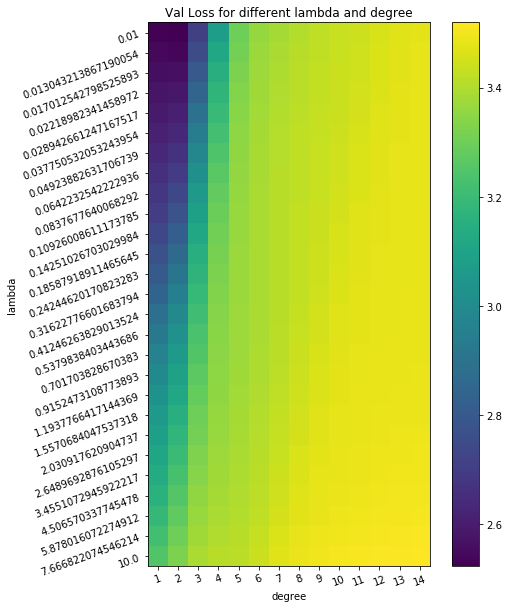

In [42]:
from helper import plot_cv_result
plot_cv_result(np.log((grid_val.T)),search_lambda,search_degree)

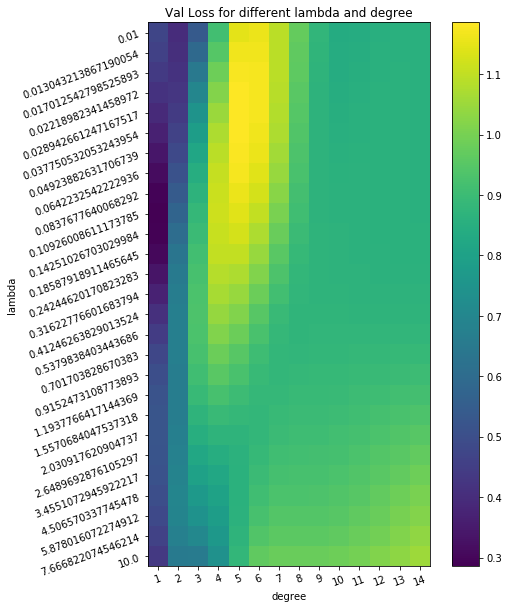

In [43]:
from helper import plot_cv_result
plot_cv_result(np.log((grid_val_std.T)),search_lambda,search_degree)

In [44]:
# best val score
best_score = np.min(grid_val)
print(best_score)

# params which give best val score
d,l= np.unravel_index(np.argmin(grid_val),grid_val.shape)
best_degree = search_degree[d]
best_lambda = search_lambda[l]
print('Best score achieved using degree:{} and lambda:{}'.format(best_degree,best_lambda))


12.465896057722029
Best score achieved using degree:2 and lambda:0.01


In [45]:
#Evaluate on the test set
X_train_poly,mu,std = expand_and_normalize_X(X_train,best_degree)
w = get_w_analytical_with_regularization(X_train_poly,y_train,best_lambda)
X_test_poly = expand_X(X_test,best_degree)
X_test_poly[:,1:] =  (X_test_poly[:,1:]-mu)/std

get_loss(w,X_train_poly,y_train,X_test_poly,y_test)

The training loss is 11.34080986909835 with std:18.817289416677134. The test loss is 14.535089828109243 with std:20.78133204720384.


14.535089828109243

**Question**: How can you interpret the linear regression coefficients?

**Question**: Is it good to have coefficients' values close to zero? 

**Question**: How would you proceed to improve the prediction?
